# Comparing Linear and Non-Linear models on Linear Data


## Purpose of this project
The goal of this project is to analyze and compare the performance of various machine learning models, specifically for binary classification tasks on a non-linear dataset. Through this comparison, we aim to highlight the strengths, limitations, and applicability of each model in different scenarios. 

We begin by analyzing the dataset and implementing the Perceptrom Learning Algorithm, a foundational model in machine learning. The perceptron lays the groundwork for more complex models by using a linear decision boundary to classify data points. 

Next, we explore the Adaptive Linear Neuron (Adaline) algorithm, which introduces continuous activation functions and uses gradient descent optimization to minimize errors. Adaline is an improvement from perceptron by allowing a smoother learning process. 

We will then compare these models to a more sophisticated non-linear classification algorithm, enabling us to evaluate their performance on non-linear data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import data

In [4]:
dataset = pd.read_csv(r"Breast_cancer_data.csv")
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
print(dataset.head(10))

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0 

In [5]:
print(dataset.tail())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
564          0  
565          0  
566          0  
567          0  
568          1  


In [6]:
print(dataset.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


In [7]:
print(dataset.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


## Understanding the Data
Each feature represents different measurement of tumors. The diagnosis columns represents the outcome whether the tumor is benign (1) or malignant (0).

<div>
<center>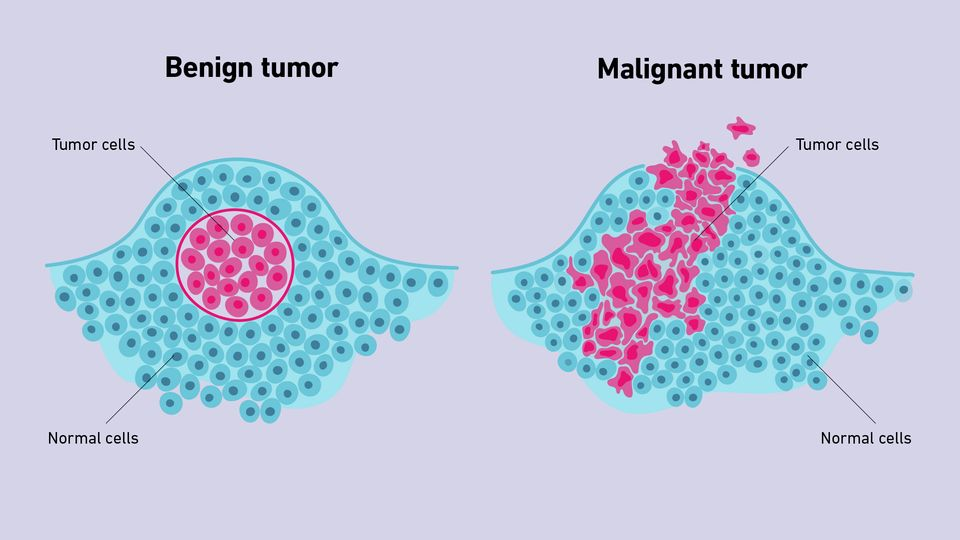</center>
</div>

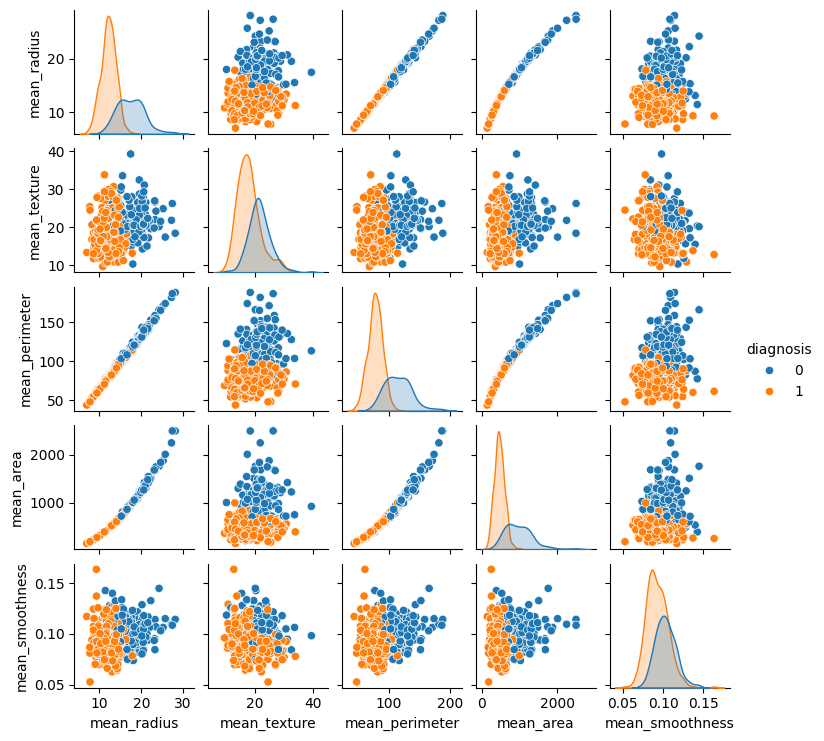

In [8]:
sns.pairplot(dataset.select_dtypes(['number']), hue='diagnosis', height=1.5)

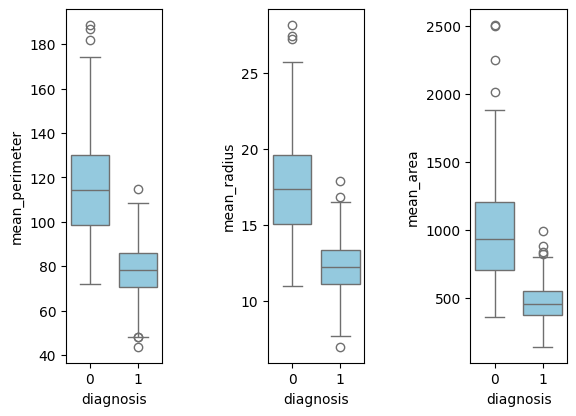

In [9]:
viz_features = ['mean_perimeter', 'mean_radius', 'mean_area']
for i, feature in enumerate(viz_features):
    plt.subplot(1, len(viz_features), i+1)
    sns.boxplot(x='diagnosis', y=feature, data=dataset, color='skyblue')
plt.tight_layout(pad=3.0)

Malignant tumors have larger values for mean perimeters, mean radius, and mean area. While benign tumors tend to be smaller and regular in shape.

## Comparison

<div>
<center>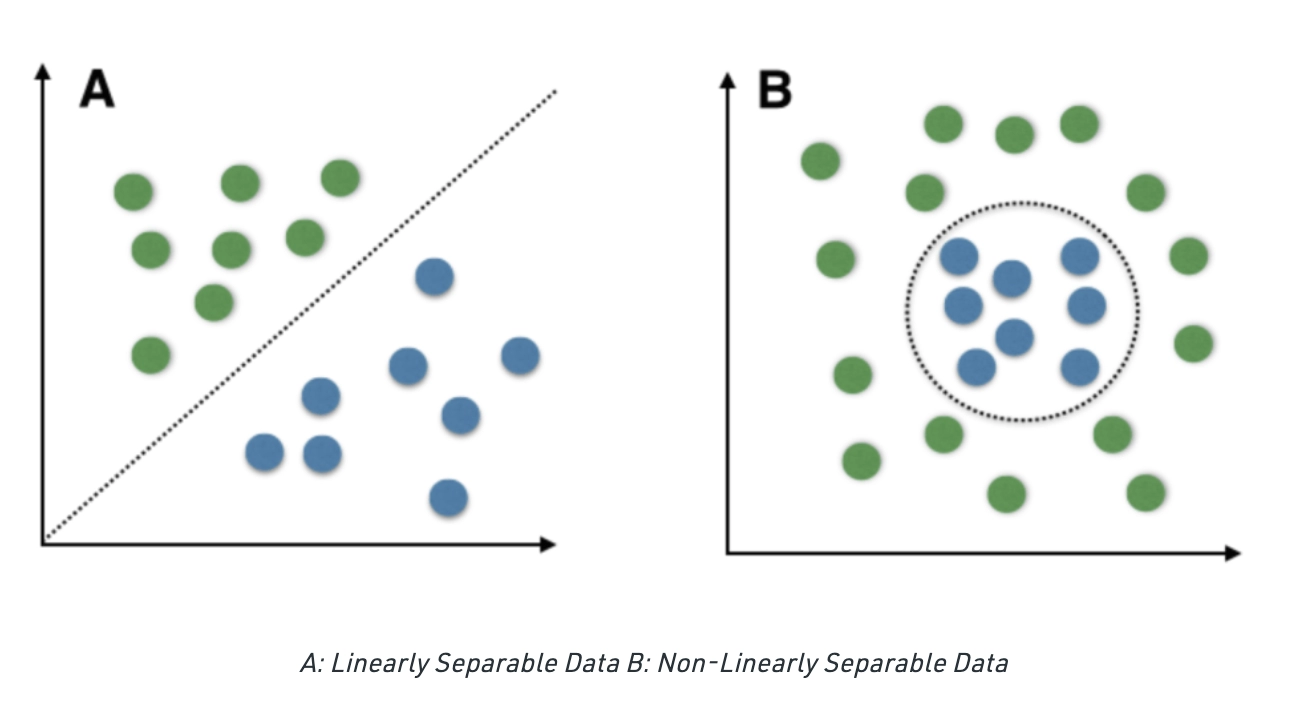</center>
</div>

Our dataset from the pairplot is not linearly separable. My prediction is that a simple  model like the single perceptron learning algorithm might not be sufficient to achieve high accuracy in our binary classification task. 

In [10]:
dataset.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

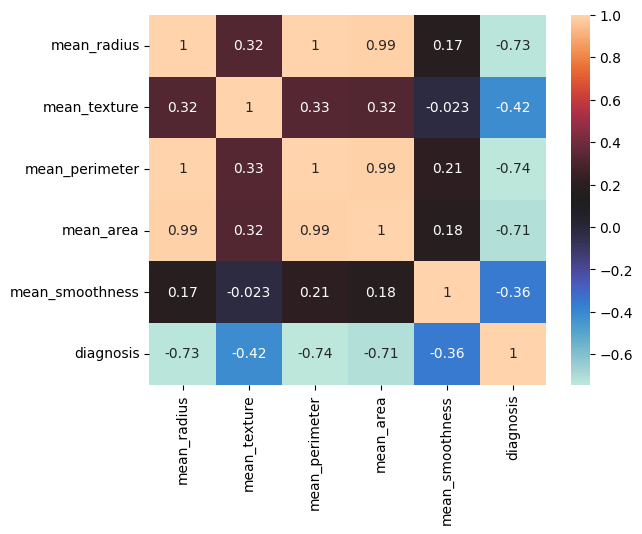

In [11]:
sns.heatmap(dataset.corr(), annot=True, cmap="icefire")

## Split the Data

In [12]:
# Get features excluding the last one
X = dataset.iloc[:, :-1].values
# Target label (diagnosis)
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the data and obtaining 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Show shape
print(f"X_train shape: { X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 5), y_train shape: (455,)
X_test shape: (114, 5), y_test shape: (114,)


## Feature Scaling
An important process in machine learning of normalizing the range of independent variables or features of data in a fixed range. 

Standardizing: Transforming data to have a mean of 0 and a standard deviation of 1.

In [15]:
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scaler = StandardScaler()

In [16]:
# Calculate mean and standard deviation of training data and scales
X_train = scaler.fit_transform(X_train)

In [17]:
# Ensure it is scaled with mean and std deviation as training data
X_test = scaler.transform(X_test)

In [18]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 5)
y_train shape: (455,)
X_test shape: (114, 5)
y_test shape: (114,)


## Closer look of our scatterplot

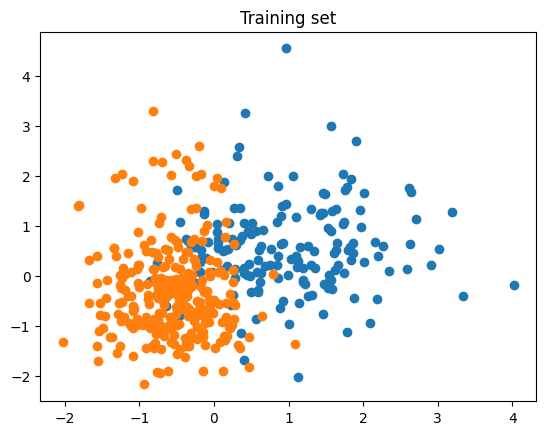

In [19]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0,1], label='class 0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], label='class 1')
plt.title('Training set')
plt.show()

<Axes: xlabel='mean_perimeter', ylabel='mean_texture'>

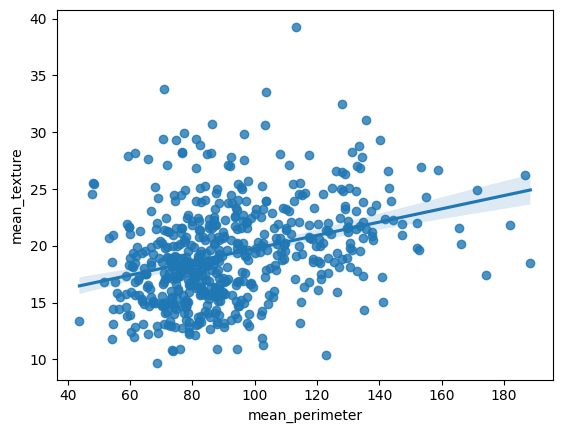

In [20]:
sns.regplot(x='mean_perimeter', y='mean_texture', data=dataset)

## What is the Perceptron Learning Algorithm?

<div>
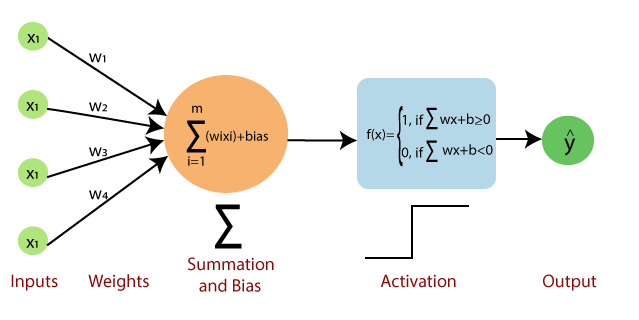
</div>

Perceptron is one of the simplest neural network introduced by Frank Rosenblatt in the late 1950s. 

We will implement the single layer perceptron which is limited to learning seperable patterns. As we have seen our data plots, observing on the WHY this machine learning model is inefficient for this scenario. 

Steps:
- Initialize weights and bias

- Training:

    We compute the weighted sum of inputs with bias (also called net input)
    $${z} = {w}^{T}{x} + {b}$$

- Apply net input to the activation function (Step function, binary threshold as ${a} = {σ(z)}$ ) to get predicted output ( $\hat{y}$ ) where 1 if ${z} >= 0$, 0 if ${z} < 0$

- Weight and Bias update
$$\Delta{w}_{j} = {n}({y}^{(i)} - \hat{y}^{(i)}){x}_{j}^{(i)}$$

$$\Delta{b} = {n}({y}^{(i)} - \hat{y}^{(i)})$$
    
    
${n}$ is the learning rate, a hyperparameter that adjusts the step size of the weight update. The higher the learning rate, we will be taking bigger steps but that means it will overshoot more often. The lower the learning rate, the slower we will reach to the global minimum but with less mistakes.

${y}^{(i)}$ is the true label of ${i}$-th training sample.

$\hat{y}^{(i)}$ is the predicted label of the ${i}$-th training sample.

${y}^{(i)}-\hat{y}^{(i)}$ to calculate the error 

## Perceptron Implementation with Numpy

In [21]:
class Perceptron_Imp:
    """
    Parameters:
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iters: int
        Epochs over the training set

    Attributes
    -----------
    weights: 1d-array
        Weights after fitting
    bias: Scalar
        Bias unit after fitting
    errors: list
        Number of misclassifications in each epoch
    """

    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta 
        self.n_iters = n_iters

    def fit(self, X_train, y_train):
        """
        Fit method for training data.

        Parameters
        ------------
        X_train : {array-like}, shape = [n_samples, n_features]
                  Training vectors where n_examples is the number of examples and n_features
                  is the number of features.
        y_train : {array-like}, shape = [n_samples]
                  Target values
        Returns
        ---------
        self : object

        """
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0.0
        self.errors = []

        # Loop through training data based on number of iterations
        for _ in range(self.n_iters):
            errors = 0
            # Loop over each training example 
            for xi, target in zip(X_train, y_train):
                # Calculate update based on the difference between target and prediction
                update = self.eta * (target - self.predict(xi))
                # Update weights
                self.weights+= update * xi
                # Update bias
                self.bias += update
                # If our predicted values matches target values,and the difference is 0, we learned our model
                errors += int(update != 0.0) 
            # Store number of errors 
            self.errors.append(errors)
        return self
    
    def net_input(self, X_train):
        # Calculate dot product of the input features and weights and add bias
        return np.dot(X_train, self.weights) + self.bias
    # Predict class label
    def predict(self, X_train):
        # Apply step function to net input
        return np.where(self.net_input(X_train) >= 0.0, 1, 0)
                

In [22]:
## Fit data
ppn = Perceptron_Imp(eta=0.01, n_iters=10)
ppn.fit(X_train, y_train)

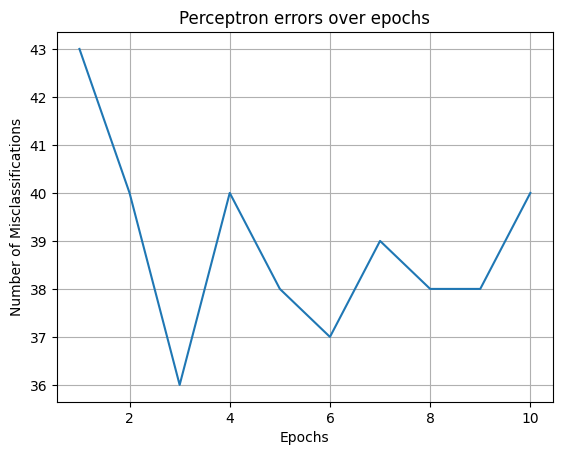

In [23]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors)
plt.title('Perceptron errors over epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)

This displays how the Perceptron Learning Algorithm adjusts its weights during the training process. As the training progresses it attempted to minimize the errors however, the number of misclassifications does not decrease linearly. 

In [24]:
predictions = ppn.predict(X_train)
print(f"Predictions: {predictions[:30]}")

Predictions: [1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1]


## Model Performance with Numpy Implementation
We were able to achieve an 88% accuracy with the perceptron learning algorithm and still capturing some of the data's structure. However. we would need a more complex model for better generalization.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.877


In [26]:
print(f'Precision score: {precision_score(y_test,y_pred):.3f}')

Precision score: 0.968


In [27]:
print(f'Recall score: {recall_score(y_test,y_pred):.3f}')

Recall score: 0.833


In [28]:
print(f'F1 score: {f1_score(y_test,y_pred):.3f}')

F1 score: 0.896


## Training Errors from each epoch

In [29]:
print(f"Errors: {ppn.errors}")

Errors: [43, 40, 36, 40, 38, 37, 39, 38, 38, 40]


## Perceptron Implementation with Sickit Learn

In [30]:
from sklearn.linear_model import Perceptron
ppn_SK = Perceptron(eta0=0.01, random_state=42)
ppn_SK.fit(X_train, y_train)

Perceptron(eta0=0.01, random_state=42)

In [31]:
y_pred = ppn_SK.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 8


In [32]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.930


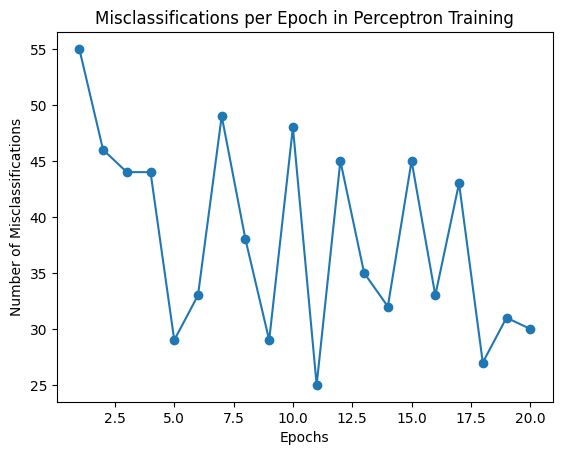

In [33]:
errors = []
# Number of epochs
n_epochs = 20
# Custom training loop
for _ in range(n_epochs):
    ppn_SK.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred = ppn_SK.predict(X_train)
    misclass = (y_train != y_pred).sum()
    errors.append(misclass)

# Plotting the number of misclassifications per epoch
plt.plot(range(1, n_epochs + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications per Epoch in Perceptron Training')
plt.show()

What does this mean?


The perceptron learning algorithm failed to converge when the data is not linearly seperable, which we have seen based on the pair plots. Since this data is not linear seperable, the algorithm is unable to find the hyperplane that separates the two classes. No matter how many iterations, it will not find a hyperplane that separates the two classes perfectly and find an optimal solution.

It is observed that the missclassification plot produces different results each time the training is run even though the random seed is fixed. This inconsistency can arise due to several factors, one of which is the random initialization of weights.

# Adaptive Linear Neuron

Adaline was published by Bernard Widrow and his doctoral student Ted Hoff after a few years after Rosenblatt's perceptron algorithm. (1960)

<div>
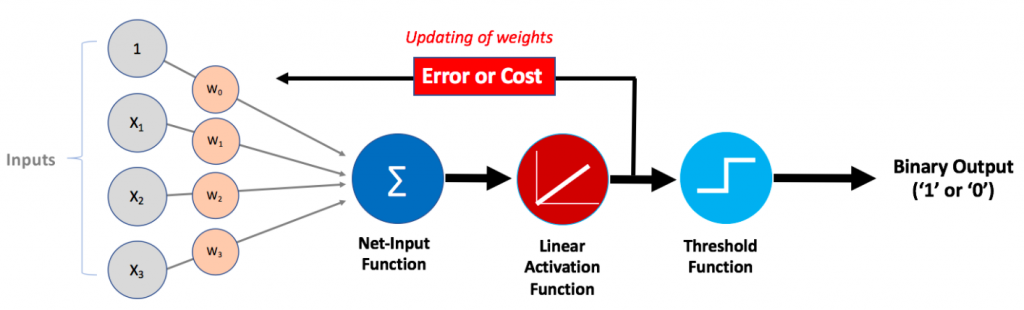
</div>

The adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights.

Adaline uses the gradient descent learning rule to minimize the mean squared error (MSE): $L(w,b) = \frac{1}{n}\sum \limits _{i=1} ^n ({y^i - σ(z^i))^2}$
Note: The linear activation function is the identity function of the net input, so $σ(z) = z$  ${(w_ix_i + b)}$

Gradient descent can be described as climbing down a hill until a local or global minimum is reached.

<div>
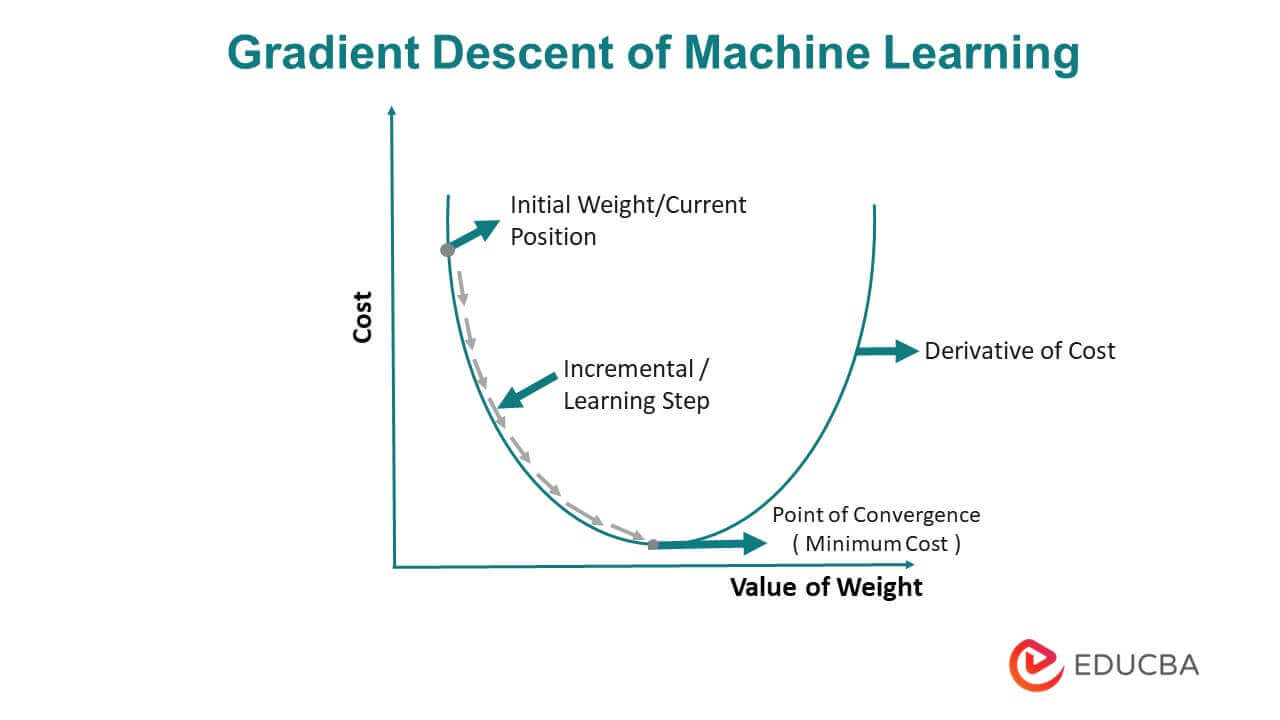
</div>

Minimizing the cost function, we need to move in the diretion opposite to the gradient $▽L(w,b)$


Update:
$$w:= w + \Delta{w}$$ $$b:=b + \Delta{b}$$

The changes in the parameters for weights and bias:

$$\Delta{w} = -n∇_wL(w,b)$$

$$\Delta{b} = -n∇_bL(w,b)$$

Computing the partial derivative of the loss function:

$$\frac{dL}{dw_j} = -\frac{2}{n}\sum \limits _{i} ({y^{(i)} - σ(z^{(i)})x_j^{(i)}}$$

$$\frac{dL}{db_j} = -\frac{2}{n}\sum \limits _{i} ({y^{(i)} - σ(z^{(i)})}$$

## Implementation

In [34]:
class Adaline:
    """
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0).
    n_iter : int
        Passes over training set.
    random_state : int
        Random number generator seed for random weight initialization

    Attributes
    ----------
    weights : 1d-Array
        Weights after fitting.
    bias : Scalar
        Bias unit after fitting.
    losses : list
        Mean Squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X_train, y_train):
        # Random number generator for initializing weights
        rgen = np.random.RandomState(self.random_state)
        # Initialize weights as small random numbers from normal distribution
        self.weights = rgen.normal(loc=0.0, scale=0.01,size=X.shape[1])
        self.bias = 0.0
        self.losses = []
        # Iterative training 
        for i in range(self.n_iter):
            # Calculate net input
            net_input = self.net_input(X_train)
            output = self.activation(net_input)
            # Calculate difference between actual and predicted values (error)
            error = (y_train - output)
            # Update weight and bias
            self.weights += self.eta * 2.0 * X_train.T.dot(error) / X_train.shape[0]
            self.bias += self.eta * 2.0 * error.mean()
            # Compute the mean squared error (loss and append to list
            loss = (error**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X_train):
        return np.dot(X_train, self.weights) + self.bias
    
    def activation(self, X_train):
        return X_train
    def predict(self, X_train):
        # Apply threshold to the net input to predict class labels
        return np.where(self.activation(self.net_input(X_train)) >= 0.5, 1, 0)

In [35]:
adn = Adaline(eta=0.1, n_iter=20)
adn.fit(X_train, y_train)

In [36]:
pred = adn.predict(X_train)
print("predictions", pred[:30])

predictions [1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1]


In [37]:
from sklearn.metrics import classification_report

In [38]:
y_pred = adn.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



We obtained a high accuracy in all the tests. 

Although adaline may seem it is performing well, we will see with a confusion matrix to determine if there are false positives or negatives.

## Confusion Matrix

<div>
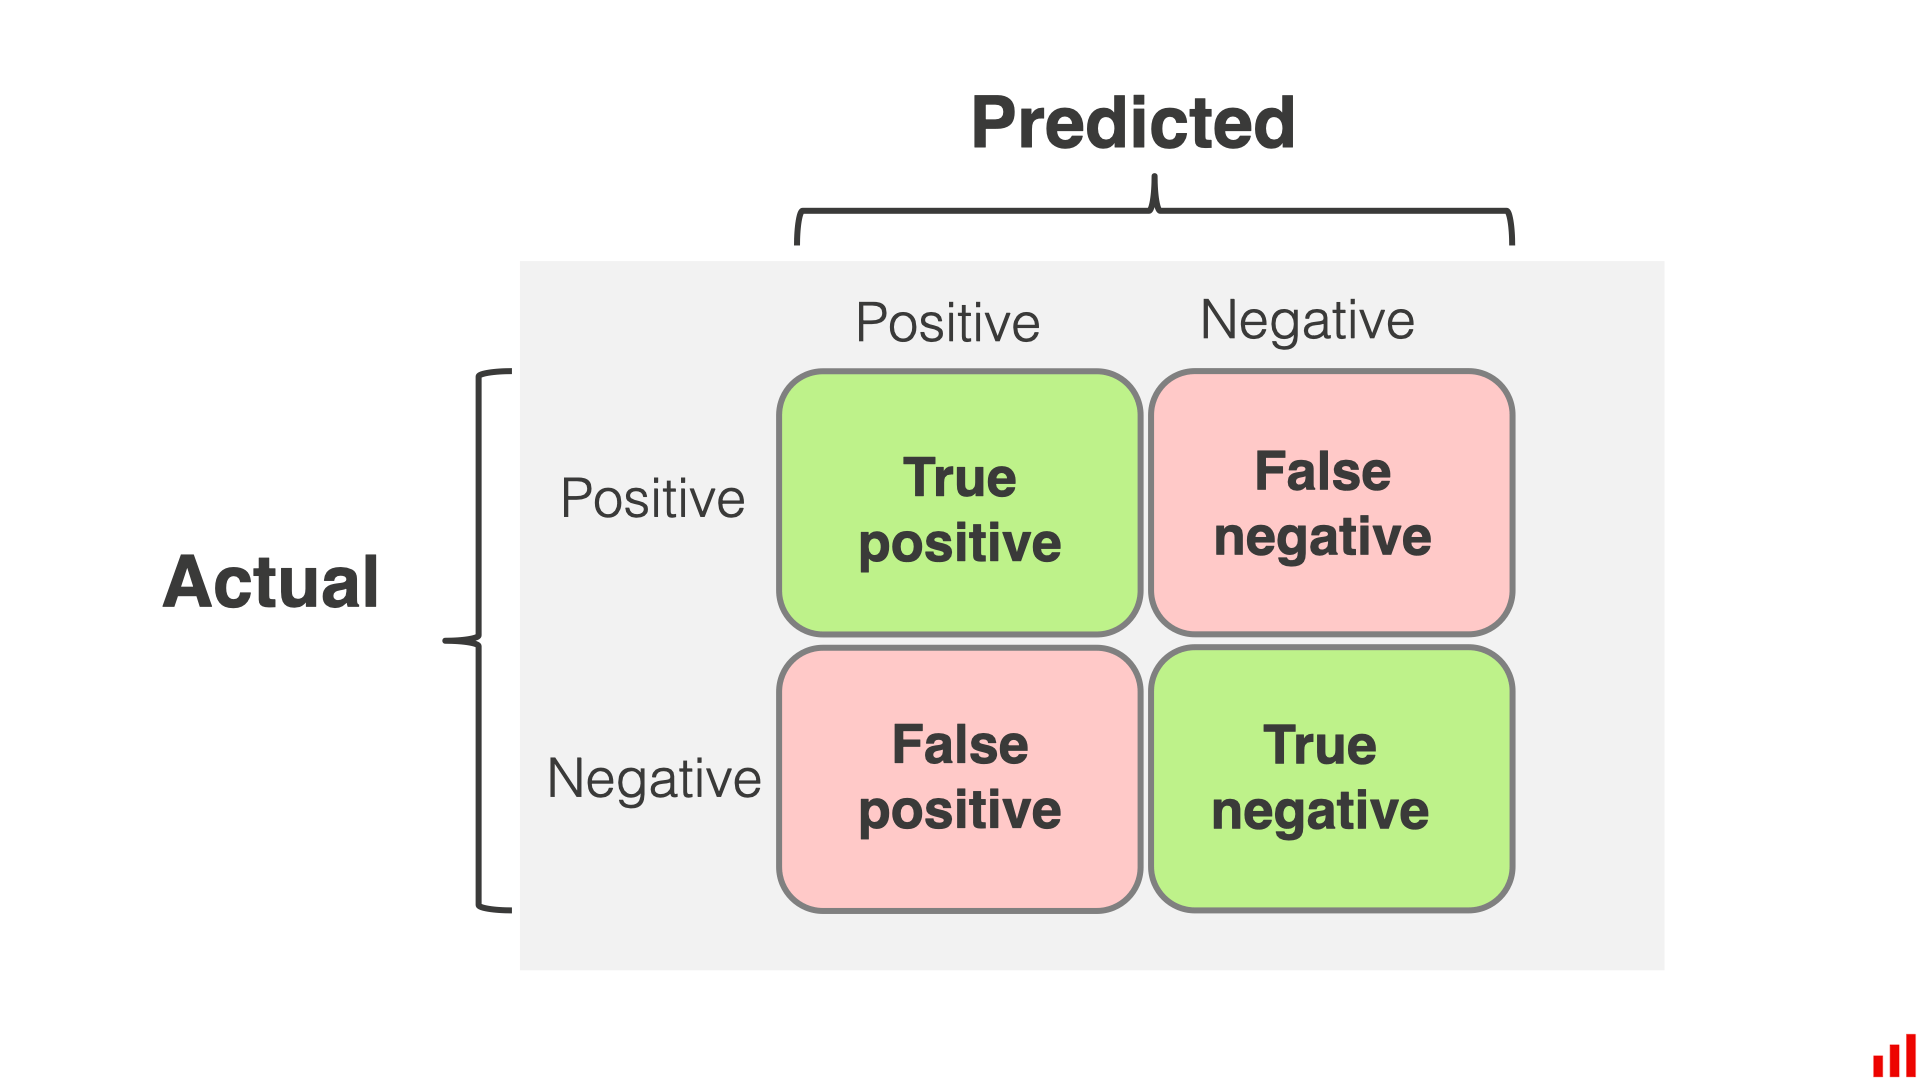
</div>

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion = confusion_matrix(y_test, y_pred)

[[37  5]
 [ 5 67]]


Text(50.722222222222214, 0.5, 'True Label')

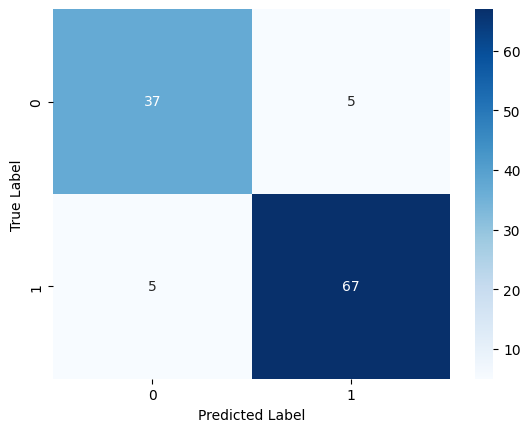

In [42]:
sns.heatmap(confusion, annot=True, fmt= "d", cmap="Blues", xticklabels=['0','1'], yticklabels=['0','1'])
print(confusion)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

We know that class 1 is Benign and class 0 is Malignant. Our model correctly classified 37 of the examples that belong to Malignant (0) (True Negatives) and 67 examples that belong to Benign (1) (True Positives). Our model incorrectly misclassified 5 examples from class 1 as class 0. 5 examples has been predicted to be benign when it is supposed to be malignant. 

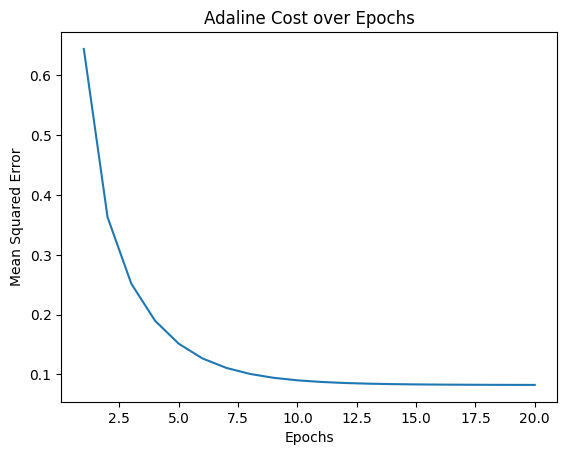

In [43]:
plt.plot(range(1, len(adn.losses) + 1), (adn.losses))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Adaline Cost over Epochs')
plt.show()

## Adaline Implementation on Two Features for Visualization

In [44]:
class Adaline_Two_Features:
    """
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0).
    n_iter : int
        Passes over training set.
    random_state : int
        Random number generator seed for random weight initialization

    Attributes
    ----------
    weights : 1d-Array
        Weights after fitting.
    bias : Scalar
        Bias unit after fitting.
    losses : list
        Mean Squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X_train, y_train):
        rgen = np.random.RandomState(self.random_state)
        # Weights for two features only
        self.weights = np.zeros(2)
        self.bias = 0.0
        self.losses = []
        # Computing the mean squared error
        for i in range(self.n_iter):
            net_input = self.net_input(X_train)
            output = self.activation(net_input)
            error = (y_train - output)
            # Update weight and bias
            self.weights += self.eta * 2.0 * X_train.T.dot(error) / X_train.shape[0]
            self.bias += self.eta * 2.0 * error.mean()
            # Compute cost
            loss = (error**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X_train):
        return np.dot(X_train, self.weights) + self.bias
    
    def activation(self, X_train):
        return X_train
    def predict(self, X_train):
        return np.where(self.activation(self.net_input(X_train)) >= 0.5, 1, 0)

## Plotting the Decision Boundary

In [45]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X_train, y_train, classifier, resolution=0.01):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_train))])

    # plot decision surface
    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_train[y_train==cl, 0],
                    y=X_train[y_train==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=['o', '^'][idx],
                    label=f'Class {cl}',
                    edgecolor='black')

## Standardizing the two features

In [46]:
X_two_features = X_train[:, :2]
X_Std = (X_two_features - X_two_features.mean()) / X_two_features.std()

In [47]:
adn_gd = Adaline_Two_Features(n_iter=20, eta=0.1, random_state=42)

In [48]:
adn_gd.fit(X_Std, y_train)

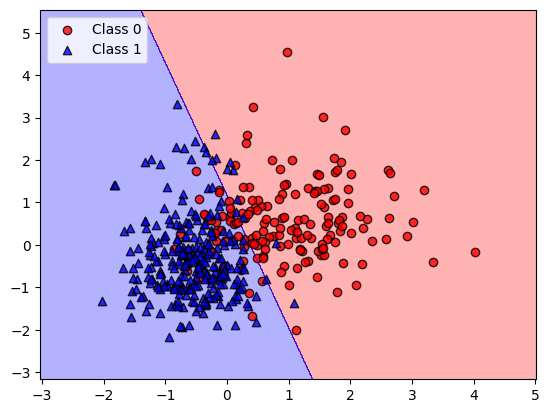

In [49]:
plot_decision_regions(X_Std, y_train, classifier=adn_gd)
plt.legend(loc='upper left')
plt.show()

This visualization helps to obeserve the seperation and distribution of classes in the feature space. We can see that there are overlaps that indicate that the model has difficulty in perfectly separating the two classes. 

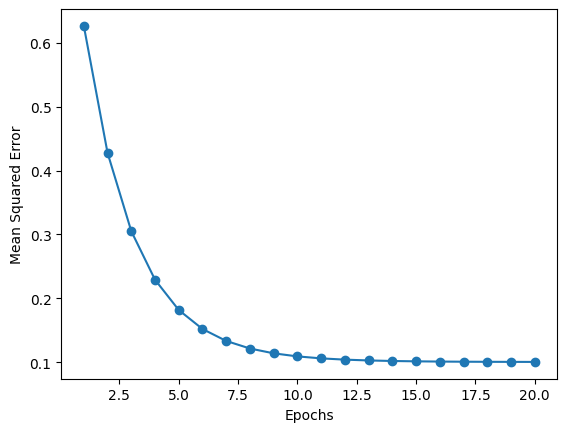

In [50]:
plt.plot(range(1, len(adn_gd.losses) + 1), adn_gd.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Supper Vector Machine

SVM or Support Vector Machine perform classification tasks by drawing on the hyperplane that maximizes the margin between the closest data points of opposite classes. Since our data is not linearly separable, we can use kernal functions that create nonlinear combinations of the original features to project them onto a higher dimensional space. In other words, making our data linearly separable.

In [51]:
from sklearn.svm import SVC

In [52]:
svm = SVC(kernel = 'poly', gamma=1.00, C=1.0, probability=True)

In [53]:
# Fitting for 2 features for visualization
svm.fit(X_Std, y_train)

SVC(gamma=1.0, kernel='poly', probability=True)

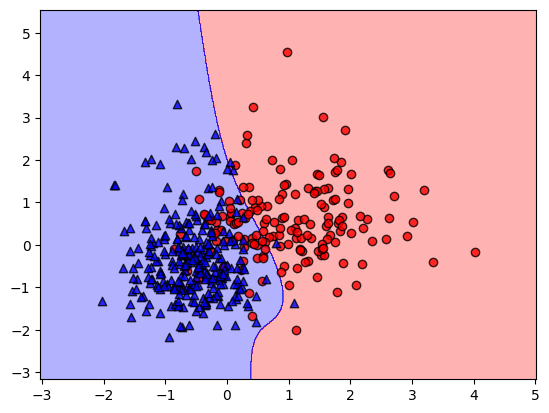

In [54]:
plot_decision_regions(X_Std, y_train, classifier=svm)

In [55]:
# Fitting for the 5 features
svm.fit(X_train, y_train)

SVC(gamma=1.0, kernel='poly', probability=True)

In [56]:
y_pred = svm.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.94      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



## Cross Validation for Our Models
Cross validation is a technique used in machine learning in order to evaluate models on unseen data. Its main purpose is to prevent overfitting that occurs when a model is trained too well on the training data performs poorly on new unseen data. We will start by evaluating both training and test accuracy (Train Test Split method) to observe the learning progress. After this, we will apply Stratified K-fold Cross-Validation to further validate the model's performance and detect any signs of overfitting or underfitting

In [58]:
train_scores, test_scores = [], []
# Updating the model weight's incrementally on batches of data
svm.fit(X_train, y_train)
# Predict on training set
train_yhat = svm.predict(X_train)
# Get accuracy score on training data
train_acc = accuracy_score(y_train, train_yhat)
train_scores.append(train_acc)
# Predict on test set
test_yhat = svm.predict(X_test)
# Get accuracy score testing data
test_acc = accuracy_score(y_test, test_yhat)
# Add testt accuracy to test scores
test_scores.append(test_acc)
print('Training set accuracy: %.3f, test set accuracy: %.3f' % (train_acc, test_acc))

Training set accuracy: 0.941, test set accuracy: 0.895


## Implementing Stratified K-Fold 
Stratified K-Fold is a technique used in machine learning for model evaluation, specialized for classification tasks. It improves upon the standard method (K-Fold) by ensuring each fold has approximately the same percentage of samples from each class in the dataset. 

In K-Fold cross validation, the model is trained and validated k times, each time using a different fold as the validation set and the remaining k-1 folds as the training set.

In [59]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [60]:
# 
splits = list(kf.split(X,y))
count = 1
for train_i, test_i in splits:
    print(f'Fold: {count}, Training set: {len(train_i)}, Testing set: {len(test_i)}')
    count+=1

Fold: 1, Training set: 455, Testing set: 114
Fold: 2, Training set: 455, Testing set: 114
Fold: 3, Training set: 455, Testing set: 114
Fold: 4, Training set: 455, Testing set: 114
Fold: 5, Training set: 456, Testing set: 113


In [80]:
def cross_val(model, X, y, n_splits):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold = 1

    for train_idx, test_idx in kf.split(X,y):
        # Split data
        X_train, X_val = X[train_idx], X[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        # To initialize model on training set
        model.fit(X_train, y_train)
        # Predict on val set
        pred = model.predict(X_val)
        # Calculate score
        acc_score = accuracy_score(y_val, pred)
        print(f'Fold {fold} Accuracy: {acc_score:.3f}')
        fold+=1
    print(f'Average Accuracy: {np.mean(acc_score):.2f}')

In [83]:
# Perceptron
cross_val(ppn_SK, X,y,n_splits=10)

Fold 1 Accuracy: 0.772
Fold 2 Accuracy: 0.825
Fold 3 Accuracy: 0.912
Fold 4 Accuracy: 0.807
Fold 5 Accuracy: 0.772
Fold 6 Accuracy: 0.632
Fold 7 Accuracy: 0.842
Fold 8 Accuracy: 0.684
Fold 9 Accuracy: 0.895
Fold 10 Accuracy: 0.857
Average Accuracy: 0.86


The perceptron performed well in most folds however fluctuates in fold 6 with only 63.2% accuracy. It might be overfitting possibly due to the reliance on a linear decision boundary.

In [85]:
# Adaline algorithm
cross_val(adn, X,y, n_splits=10)

Fold 1 Accuracy: 0.614
Fold 2 Accuracy: 0.614
Fold 3 Accuracy: 0.632
Fold 4 Accuracy: 0.632
Fold 5 Accuracy: 0.632
Fold 6 Accuracy: 0.632
Fold 7 Accuracy: 0.632
Fold 8 Accuracy: 0.632
Fold 9 Accuracy: 0.632
Fold 10 Accuracy: 0.625
Average Accuracy: 0.62


Given the nature of the dataset, adaline's performance is expected since it likely cannot capture the complexity of the decision boundary.

In [86]:
svm_model = SVC(kernel='poly', degree=3, C=1)

In [87]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [88]:
fold = 1
fold_acc = []

# Perform cross-validation
for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train
    svm_model.fit(X_train, y_train)
    # Get score
    accuracy = svm_model.score(X_test, y_test)
    fold_acc.append(accuracy)
    print(f"Fold: {fold} Accuracy: {accuracy:.2f}")
    # Increment
    fold+=1
print(f'Average Accuracy: {np.mean(fold_acc):.2f}')

Fold: 1 Accuracy: 0.86
Fold: 2 Accuracy: 0.89
Fold: 3 Accuracy: 0.93
Fold: 4 Accuracy: 0.82
Fold: 5 Accuracy: 0.84
Fold: 6 Accuracy: 0.88
Fold: 7 Accuracy: 0.89
Fold: 8 Accuracy: 0.96
Fold: 9 Accuracy: 0.89
Fold: 10 Accuracy: 0.91
Average Accuracy: 0.89


With an average accuracy of 89%, the SVM is well suited for the classification task. It is able to generalize well and does not suffer from overfitting or underfitting. 

## Key Takeaways

Our findings showed that linear models like the Perceptron and Adaline struggled to acheive high accuracy due to the non-linearly separable nature of the dataset. Adaline, while stable across cross-validation, maintained a low accuracy indicating its inability to capture the complex decision boundary. The Perceptron also showed inconsistent performance particularly in one fold emphasizing the limitations of linear classifiers in this context. The SVM performed well across all folds and demonstrated its ability to handle non-linear relationships in the data effectively. One reason for this is due to its kernel-based approach that maps data into a higher dimensional space for ebtter separation.  

## Areas for Improvement

We can fine tune the hyperparameters of the SVM that will potentially enhance its performance. Additionally, exploring other non linear models such as decision trees or other complex neural networks can provide great insights. 

While linear models like Perceptron and Adaline serve as useful foundations, more advanced models such as SVM are necessary for handling complex non linearly seperable datasets. 